In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
import GPyOpt
import sys
from matplotlib.collections import EllipseCollection

%matplotlib inline

In [2]:
observations = pd.read_csv('observations/observations.csv')

In [3]:
observations.tail(10)

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,reconstructible,reco_passed_no_clones
1610,3.6,1.8,0.900000,1.000000,12.000000,10.000000,8.374288,169.0,164.0
1611,3.6,1.8,0.900000,1.000000,12.000000,10.000000,12.898512,146.0,144.0
1612,3.6,1.8,0.900000,1.000000,7.848115,12.000000,15.000000,173.0,168.0
1613,3.6,1.8,0.900000,1.233278,8.040339,11.133969,7.566286,160.0,157.0
1614,3.6,1.8,1.768691,1.727580,4.833175,10.566780,13.716033,156.0,153.0
1615,3.6,1.8,2.384888,2.410366,6.422656,10.000000,6.547389,162.0,155.0
1616,3.6,1.8,0.900000,1.000000,8.739767,10.000000,10.868873,160.0,156.0
1617,3.6,1.8,0.900000,3.591697,6.047118,12.000000,6.530585,135.0,134.0
1618,3.6,1.8,4.500000,1.341527,5.765610,10.000000,5.000000,172.0,168.0
1619,3.6,1.8,1.092567,2.423684,2.791100,11.756037,10.236167,152.0,146.0


In [4]:
observations['objective'] = observations['reco_passed_no_clones'] / 500

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

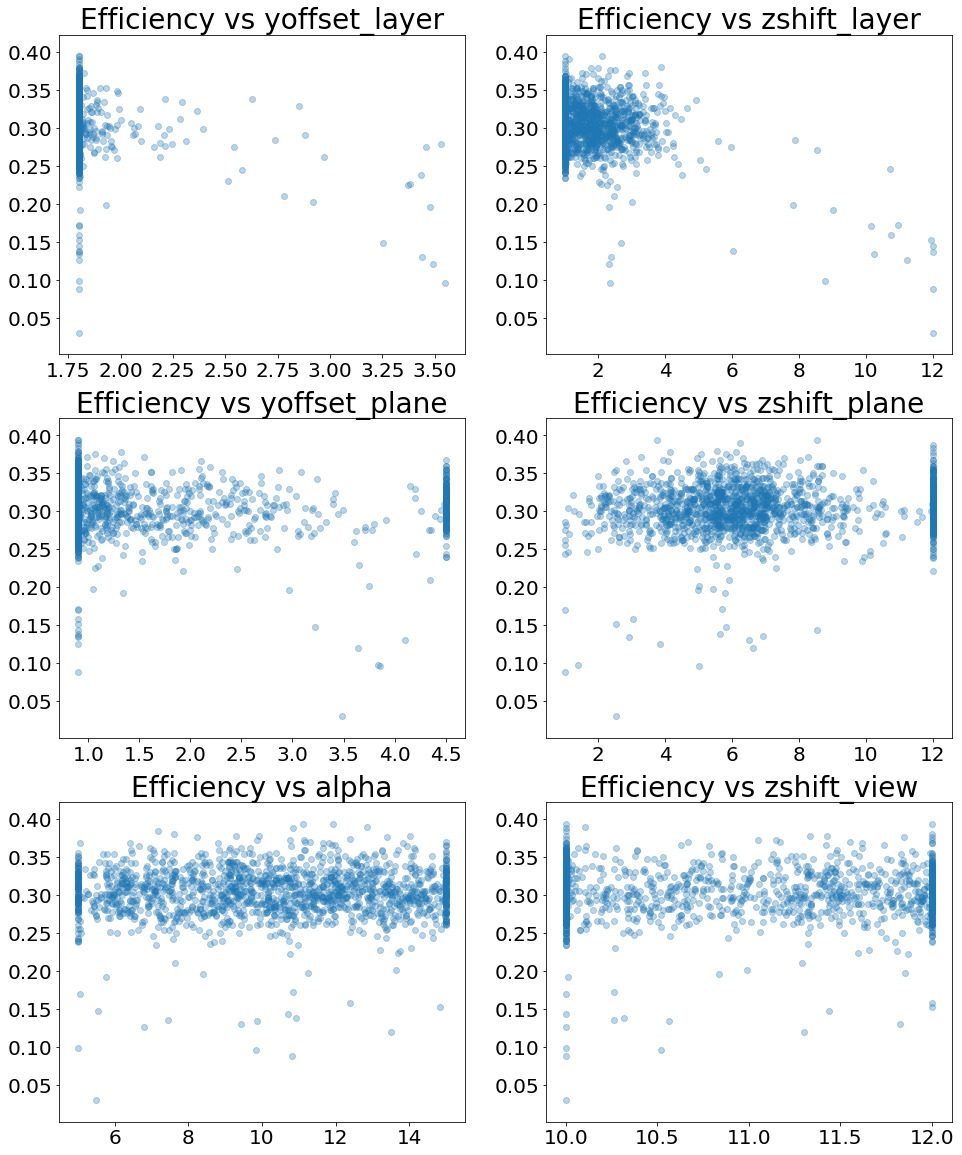

In [5]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
plt.title('Efficiency vs yoffset_layer', fontsize=28)
plt.scatter(observations.yoffset_layer[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 2)
plt.title('Efficiency vs zshift_layer', fontsize=28)
plt.scatter(observations.zshift_layer[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 3)
plt.title('Efficiency vs yoffset_plane', fontsize=28)
plt.scatter(observations.yoffset_plane[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 4)
plt.title('Efficiency vs zshift_plane', fontsize=28)
plt.scatter(observations.zshift_plane[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 5)
plt.title('Efficiency vs alpha', fontsize=28)
plt.scatter(observations.alpha[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 6)
plt.title('Efficiency vs zshift_view', fontsize=28)
plt.scatter(observations.zshift_view[:], observations.objective[:], alpha=0.3)
plt.xticks(np.linspace(10, 12, 5), fontsize=20)
plt.yticks(fontsize=20)

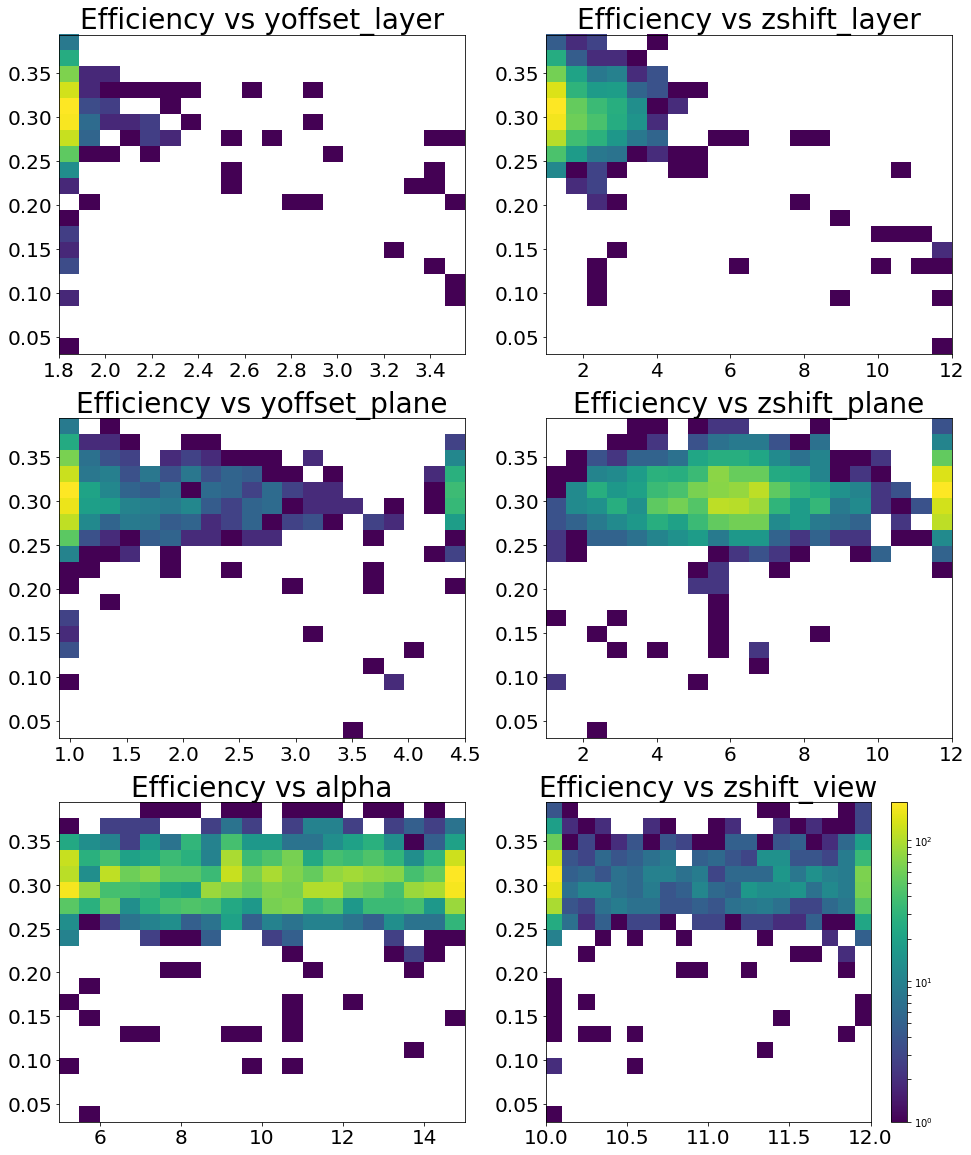

In [6]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
plt.title('Efficiency vs yoffset_layer', fontsize=28)
plt.hist2d(observations.dropna().yoffset_layer[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 2)
plt.title('Efficiency vs zshift_layer', fontsize=28)
plt.hist2d(observations.dropna().zshift_layer[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 3)
plt.title('Efficiency vs yoffset_plane', fontsize=28)
plt.hist2d(observations.dropna().yoffset_plane[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 4)
plt.title('Efficiency vs zshift_plane', fontsize=28)
plt.hist2d(observations.dropna().zshift_plane[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 5)
plt.title('Efficiency vs alpha', fontsize=28)
plt.hist2d(observations.dropna().alpha[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 6)
plt.title('Efficiency vs zshift_view', fontsize=28)
plt.hist2d(observations.dropna().zshift_view[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(np.linspace(10, 12, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.colorbar()

In [7]:
np.linspace(10, 12, 5)

array([10. , 10.5, 11. , 11.5, 12. ])

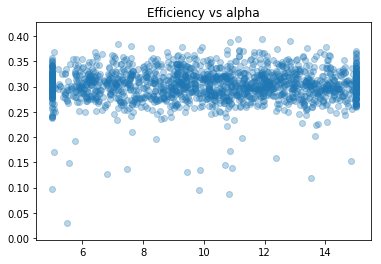

In [8]:
plt.title('Efficiency vs alpha')
plt.scatter(observations.alpha[:], observations.objective[:], alpha=0.3)

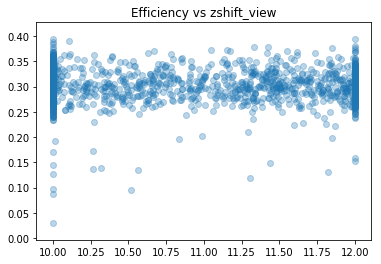

In [9]:
plt.title('Efficiency vs zshift_view')
plt.scatter(observations.zshift_view[:], observations.objective[:], alpha=0.3)

In [10]:
def plot_view(x, length=5):
    
    plt.figure(figsize=(9, 16))
    pitch, yoffset_layer, yoffset_plane, zshift_layer, zshift_plane, zshift_view, alpha = x
    radius = 43.
    for plane in [0, 1]:
        for layer in [0, 1]:
            
            zs = np.array([zshift_layer * layer + zshift_plane * plane] * length)
            ys = np.cumsum([pitch] * length) - pitch + yoffset_layer * layer + yoffset_plane * plane
            plt.scatter(zs, ys, s=np.pi * radius**2, facecolor='none', edgecolors='blue')
#     plt.scatter([0], [0.5], color='red')
#     plt.scatter([0], [0], color='green')
    plt.scatter([-0.5], [-0.5], color='white')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis("off")
    plt.show()

In [174]:
class Tracker(object):
    
    def __init__(self, R, pitch, y_offset_layer, y_offset_plane, z_shift_layer, z_shift_plane, z_shift_view):
        """
        Generates Z, Y coordinates of straw tubes of the tracking system.

        Parameters:
        -----------
        R : float
            Radius of a straw tube.
        pitch : float
            Distance between two adjacent tubes in one layer of the system.
        y1 : float
            Shift between two layers of tubes.
        y2 : float
            Shift between two layers of tubes.
        y3 : float
            Shift between two layers of tubes.
        z1 : float
            Shift between two layers of tubes.
        z2 : float
            Shift between two layers of tubes.
        z3 : float
            Shift between two layers of tubes.
        """
        
        self.R = R
        self.pitch = pitch
        self.y_offset_layer = y_offset_layer
        self.y_offset_plane = y_offset_plane
        self.z_shift_layer = z_shift_layer
        self.z_shift_plane = z_shift_plane
        self.z_shift_view = z_shift_view
        
        
    def create_geometry(self):
        """
        Generate Z, Y coordinates of the tubes.
        """
        
        base = np.arange(-100, 101, 1)
        step = self.pitch
        
        layer1_y = step * base
        layer1_z = 0. * np.ones(len(base))
        
        layer2_y = layer1_y + self.y_offset_layer
        layer2_z = layer1_z + self.z_shift_layer
        
        layer3_y = layer1_y + self.y_offset_plane
        layer3_z = layer1_z + self.z_shift_plane
        
        layer4_y = layer3_y + self.y_offset_layer
        layer4_z = layer3_z + self.z_shift_layer
        
        
        layer5_y = layer1_y
        layer5_z = layer1_z + self.z_shift_view
        
        layer6_y = layer5_y + self.y_offset_layer
        layer6_z = layer5_z + self.z_shift_layer
        
        layer7_y = layer5_y + self.y_offset_plane
        layer7_z = layer5_z + self.z_shift_plane
        
        layer8_y = layer7_y + self.y_offset_layer
        layer8_z = layer7_z + self.z_shift_layer
        
        Z = np.concatenate((layer1_z.reshape(-1, 1), 
                            layer2_z.reshape(-1, 1), 
                            layer3_z.reshape(-1, 1), 
                            layer4_z.reshape(-1, 1), 
                            layer5_z.reshape(-1, 1), 
                            layer6_z.reshape(-1, 1), 
                            layer7_z.reshape(-1, 1), 
                            layer8_z.reshape(-1, 1)), axis=1)
        
        Y = np.concatenate((layer1_y.reshape(-1, 1), 
                            layer2_y.reshape(-1, 1), 
                            layer3_y.reshape(-1, 1), 
                            layer4_y.reshape(-1, 1), 
                            layer5_y.reshape(-1, 1), 
                            layer6_y.reshape(-1, 1), 
                            layer7_y.reshape(-1, 1), 
                            layer8_y.reshape(-1, 1)), axis=1)
        
        geo = [Z, Y]
        
        return geo

    
def geometry_display(Z, Y, R, y_min=-10, y_max=10):
    """
    Displays straw tubes of the tracking system.

    Parameters:
    -----------
    Z : array_like
        Array of z-coordinates of the tubes.
    Y : array_like
        Array of y-coordinates of the tubes.
    R : float
        Radius of a tube.
    y_min : float
        Minimum y-coordinate to display.
    y_max : float
        Maximum y-coordinate to display.
    """

    Z_flat = np.ravel(Z)
    Y_flat = np.ravel(Y)

    z_min = Z_flat.min()
    z_max = Z_flat.max()

    sel = (Y_flat >= y_min) * (Y_flat < y_max)
    Z_flat = Z_flat[sel]
    Y_flat = Y_flat[sel]

    plt.figure(figsize=(11, 11 * (y_max - y_min + 2) / (z_max - z_min + 10)))
    plt.axes(frameon=False)
    plt.scatter(Z_flat, Y_flat)

    for z,y in zip(Z_flat, Y_flat):
        circle = plt.Circle((z, y), R, color='b', fill=False, linewidth=2)
        plt.gcf().gca().add_artist(circle)

    plt.xlim(z_min - 5, z_max + 5)
    plt.ylim(y_min - 1, y_max + 1)
    plt.xlabel('', size=14)
    plt.ylabel('', size=14)
    plt.xticks([], size=14)
    plt.yticks([], size=14)


In [175]:
observations[observations.objective > observations.objective.max()-0.01]

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,reconstructible,reco_passed_no_clones,objective
370,3.6,1.8,0.9,2.102540,3.746748,12.00000,11.115041,197.0,197.0,0.394
825,3.6,1.8,0.9,1.133267,6.240375,10.10571,12.846444,198.0,195.0,0.390
1224,3.6,1.8,0.9,1.000000,12.000000,10.00000,10.852854,197.0,194.0,0.388
1531,3.6,1.8,0.9,1.000000,8.536018,10.00000,11.929892,198.0,197.0,0.394


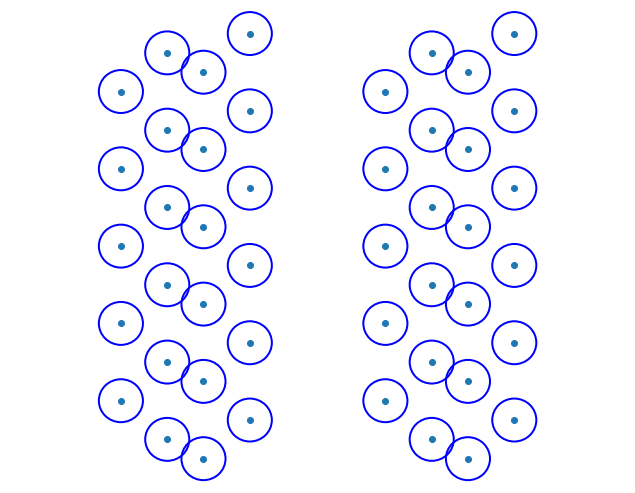

In [189]:
[Z, Y] = Tracker(R=1., 
                 pitch=3.6, 
                 y_offset_layer=1.8, 
                 y_offset_plane=0.9, 
                 z_shift_layer=2.102540, 
                 z_shift_plane=3.746748, 
                 z_shift_view=12.).create_geometry()

geometry_display(Z, Y, R=1., y_min=-10, y_max=10)
#plt.savefig("pics/tubes_opt.pdf", format='pdf', bbox_inches='tight', transparent=False)

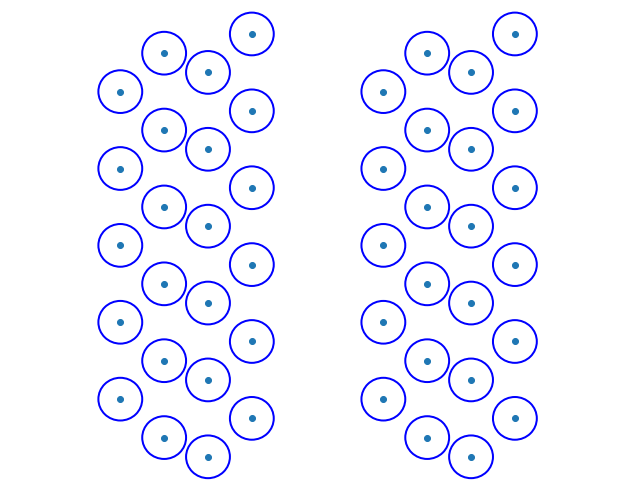

In [176]:
[Z, Y] = Tracker(R=1., 
                 pitch=3.6, 
                 y_offset_layer=1.8, 
                 y_offset_plane=0.9, 
                 z_shift_layer=2.0, 
                 z_shift_plane=4.0, 
                 z_shift_view=12.).create_geometry()

geometry_display(Z, Y, R=1., y_min=-10, y_max=10)
plt.savefig("pics/tubes_opt.pdf", format='pdf', bbox_inches='tight', transparent=False)

In [177]:
observations.head(1)

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,reconstructible,reco_passed_no_clones,objective
0,3.6,3.436777,1.12881,2.210571,6.893522,11.797108,8.701587,157.0,119.0,0.238


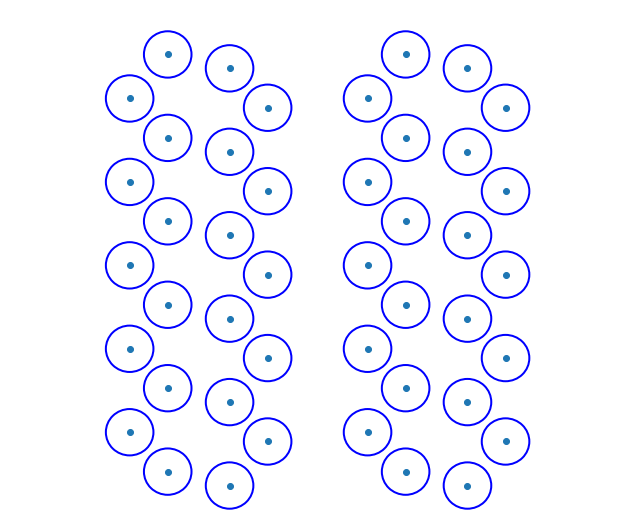

In [190]:
[Z, Y] = Tracker(R=1., 
                 pitch=3.6, 
                 y_offset_layer=1.9, 
                 y_offset_plane=1.3, 
                 z_shift_layer=1.6, 
                 z_shift_plane=4.2, 
                 z_shift_view=10.).create_geometry()

geometry_display(Z, Y, R=1., y_min=-10, y_max=10)
plt.savefig("pics/tubes_base.pdf", format='pdf', bbox_inches='tight', transparent=False)

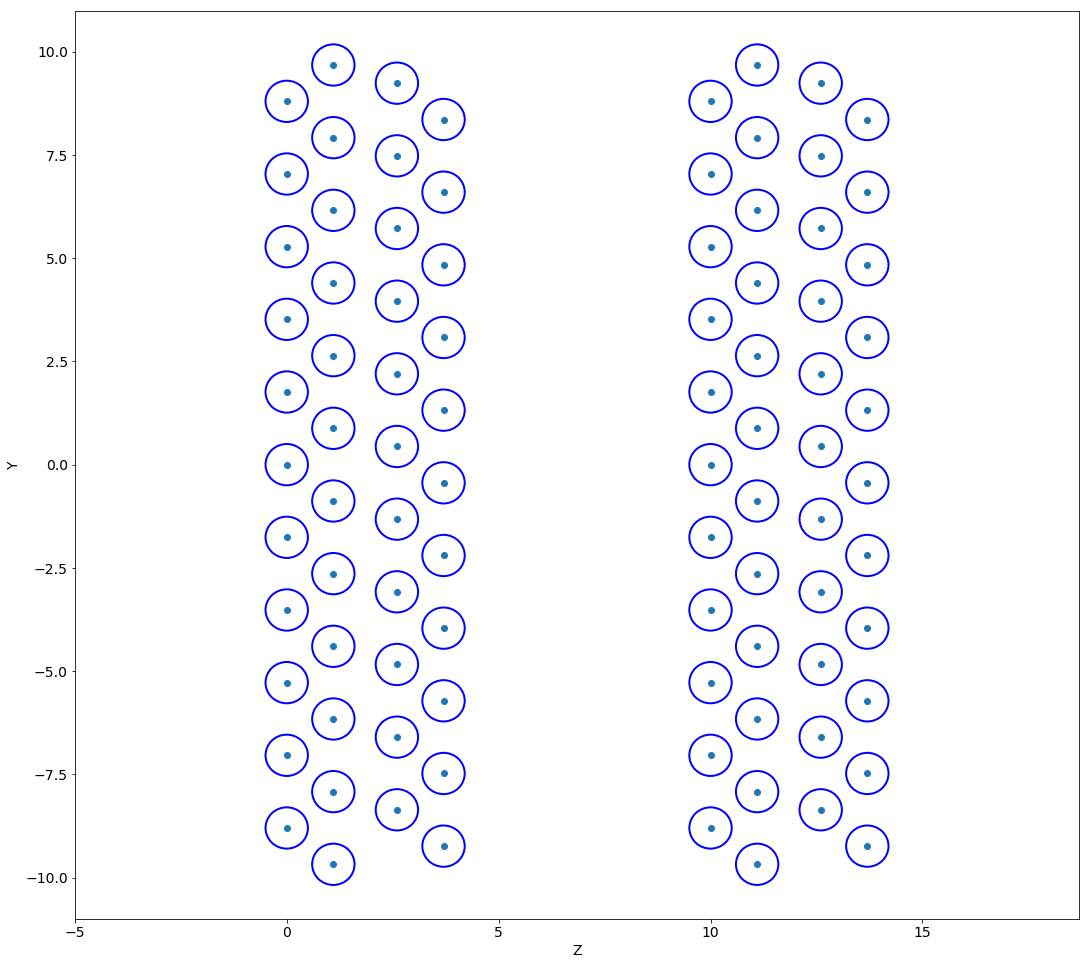

In [130]:
[Z, Y] = Tracker(R=0.5, 
                 pitch=1.76, 
                 y_offset_layer=1.76 / 2, 
                 y_offset_plane=1.76 / 4, 
                 z_shift_layer=1.1, 
                 z_shift_plane=2.6, 
                 z_shift_view=10.).create_geometry()

geometry_display(Z, Y, R=0.5, y_min=-10, y_max=10)

# Repeat Daniel pics

Fit GP model:

In [13]:
design = observations.dropna()[observations.columns[:-3]].values
#because we want to maximize
answers = -observations.dropna()[observations.columns[-1:]].values

kernel = GPy.kern.RBF(input_dim=7)
m = GPy.models.GPRegression(design, answers, kernel)

In [14]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    02s98  0004   3.283663e+07   9.419873e+13 
    11s89  0016  -3.462432e+03   1.237334e+01 
    18s45  0025  -3.462658e+03   2.491552e-06 
Runtime:     18s45
Optimization status: Converged



In [15]:
values = m.predict(design)

In [16]:
arm = np.array(values)[0].argmin()
arm

155

In [17]:
m.predict_noiseless(design[arm].reshape(1, -1))

(array([[-0.31090348]]), array([[2.70608873e-05]]))

In [18]:
print(values[0][arm], values[1][arm])

[-0.31090348] [0.00077217]


In [19]:
design[arm]

array([ 3.6       ,  1.8       ,  4.5       ,  1.        ,  8.59877115,
       10.        ,  5.        ])

Fit GGPM model:

In [20]:
design = observations.dropna()[observations.columns[:-3]].values
trials = np.array([[500]] * len(design))
y = observations.dropna()[['reco_passed_no_clones']].values

kernel = GPy.kern.RBF(input_dim=7)
ggpm = GPy.core.GP(design, y, kernel=kernel, 
                   Y_metadata={'trials': trials},
                   inference_method=GPy.inference.latent_function_inference.laplace.Laplace(),
                   likelihood=GPy.likelihoods.Binomial())

In [21]:
ggpm.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    15s47  0002   7.088840e+03   1.148337e+05 
 01m12s97  0009   6.722632e+03   6.742012e+00 
 01m59s15  0015   6.721775e+03   1.566757e-05 
Runtime:  01m59s15
Optimization status: Converged



In [22]:
lik = GPy.likelihoods.Bernoulli()
values = lik.gp_link.transf(ggpm._raw_predict(design)[0])

In [23]:
arm = np.array(values).argmax()
arm

86

In [24]:
values[arm]

array([0.31771126])

In [25]:
design[arm]

array([ 3.6       ,  1.8       ,  4.5       ,  2.25398148,  4.98573016,
       10.        ,  5.        ])

In [26]:
pitch, yoffset_layer, yoffset_plane, zshift_layer, zshift_plane, zshift_view, alpha = design[arm]
    
cmd = "/opt/disney-run.sh python /opt/objective.py --pitch "+str(pitch)+" --yoffset_layer "+str(yoffset_layer)+\
    " --yoffset_plane "+str(yoffset_plane)+" --zshift_layer "+str(zshift_layer)+" --zshift_plane "+\
    str(zshift_plane)+" --zshift_view "+str(zshift_view)+" --alpha "+str(int(alpha))+\
    " --nEvents 5000 --method FH"

In [27]:
cmd

'/opt/disney-run.sh python /opt/objective.py --pitch 3.6 --yoffset_layer 1.8 --yoffset_plane 4.5 --zshift_layer 2.253981478412842 --zshift_plane 4.985730159628287 --zshift_view 10.0 --alpha 5 --nEvents 5000 --method FH'

In [28]:
df_tmp = pd.DataFrame(columns=observations.columns[1:7])
df_tmp.loc[0] = design[arm][1:]

In [29]:
df_tmp

,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha
0,1.8,4.5,2.253981,4.98573,10.0,5.0


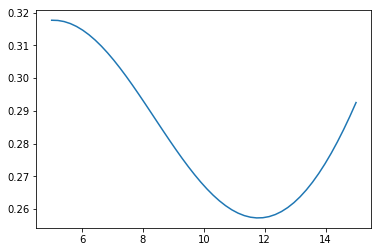

In [30]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, -1] = np.linspace(5, 15, 50)
plt.plot(np.linspace(5, 15, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

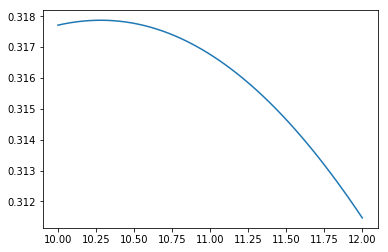

In [31]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, -2] = np.linspace(10, 12, 50)
plt.plot(np.linspace(10, 12, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

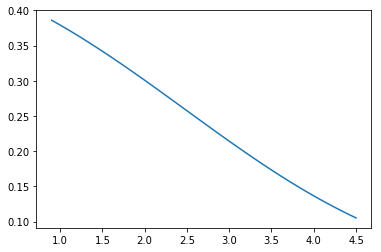

In [32]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, 1] = np.linspace(0.9, 4.5, 50)
plt.plot(np.linspace(0.9, 4.5, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

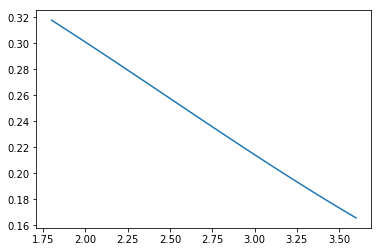

In [33]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, 1] = np.linspace(1.8, 3.6, 50)
plt.plot(np.linspace(1.8, 3.6, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

In [34]:
best_point = design[arm]
arr = np.array([best_point] * 10000)
z_layer = np.linspace(np.sqrt(-(3.6-1.8)**2+2**2), 3, 100)
z_plane = np.linspace(2.9,7.1, 100)
z_layer, z_plane = np.meshgrid(z_layer, z_plane)
grid = np.dstack([z_layer, z_plane]).reshape(10000, 2)
arr[:, 3:5] = grid

In [35]:
argmax = np.argmax(lik.gp_link.transf(ggpm._raw_predict(arr)[0]))
best_point = arr[argmax][3:5]

In [36]:
lik.gp_link.transf(ggpm._raw_predict(arr[argmax].reshape(1, -1))[0])

array([[0.31897051]])

In [37]:
#lik.gp_link.transf(ggpm._raw_predict(best_point.reshape(1, -1))[0])

Text(0.5,1,'Ratio of reconstructed events')

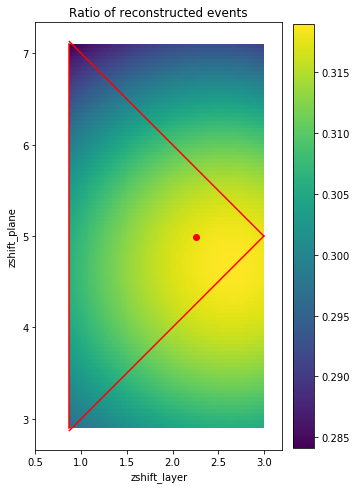

In [38]:
plt.figure(figsize=(5, 10))
pic = plt.imshow(lik.gp_link.transf(ggpm._raw_predict(arr)[0]).reshape(100, 100), extent=[np.sqrt(-(3.6-1.8)**2+2**2), 3,\
                                                                                    2.9, 7.1])
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),3]), np.array([np.sqrt(-(3.6-1.8)**2+2**2),3])+2, c='red')
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),3]), -np.array([np.sqrt(-(3.6-1.8)**2+2**2),3])+8, c='red')
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),np.sqrt(-(3.6-1.8)**2+2**2)]), [2.9,7.1], c='red')
plt.colorbar(pic, fraction=0.076, pad=0.04)
plt.xlim([0.5, 3.2])
plt.scatter([2.25398148], [4.98573016], c='red')
plt.xlabel('zshift_layer')
plt.ylabel('zshift_plane')
plt.title('Ratio of reconstructed events')
# plt.scatter([best_point[0]], [best_point[1]], c='blue')

In [39]:
# np.sqrt(-(3.6-1.8)**2+2**2)<z_layer
# np.sqrt(-(1.8-4.5)**2+2**2)+z_plane<z_layer
# z_plane+z_layer<10-2
# z_layer<z_plane-2

# New figures

In [40]:
observations.shape

(1620, 10)

In [41]:
observations.head()

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,reconstructible,reco_passed_no_clones,objective
0,3.6,3.436777,1.128810,2.210571,6.893522,11.797108,8.701587,157.0,119.0,0.238
1,3.6,3.491098,3.638826,2.318519,6.633024,11.303923,13.511367,135.0,60.0,0.120
2,3.6,1.934191,1.723673,1.566266,6.826156,11.784093,8.594912,155.0,145.0,0.290
3,3.6,3.372442,2.453974,2.263205,4.947135,11.594591,13.698964,135.0,112.0,0.224
4,3.6,3.251162,3.225302,2.697990,5.830484,11.440073,5.547616,147.0,74.0,0.148


In [42]:
errors = []
estimated_objectives = []
best_points = []

step_size = 400
X = np.arange(220, 1620+step_size, step_size)

for step in X:
    design = observations.dropna()[observations.columns[:-3]].values[:step]
    #because we want to maximize
    answers = -observations.dropna()[observations.columns[-1:]].values[:step]

    kernel = GPy.kern.RBF(input_dim=7, variance=1., lengthscale=1.)
    m = GPy.models.GPRegression(design, answers, kernel, noise_var=10**-10)
    m.optimize(messages=False)
    m.optimize_restarts(num_restarts = 1)

    #values = m.predict_noiseless(design)
    values = m.predict(design)
    arm = np.array(values)[0].argmin()
    
    errors.append(values[1][arm][0])
    best_points.append(arm)
    estimated_objectives.append(values[0][arm][0])
    print(step)

Optimization restart 1/1, f = 30.55436056092576
220
Optimization restart 1/1, f = -1280.0166276807925
620
Optimization restart 1/1, f = -2154.521900393227
1020
Optimization restart 1/1, f = -3040.1828965517434
1420
Optimization restart 1/1, f = -3462.65803446714
1820


In [43]:
values[0][arm][0], answers[arm], values[1][arm][0]

(-0.31089614235254326, array([-0.306]), 0.0007721854174135748)

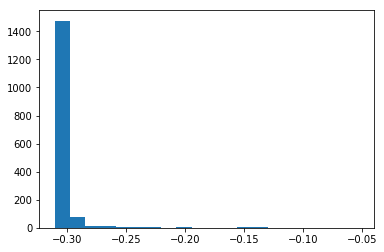

In [44]:
plt.hist(np.array(values)[0], bins=20)
plt.show()

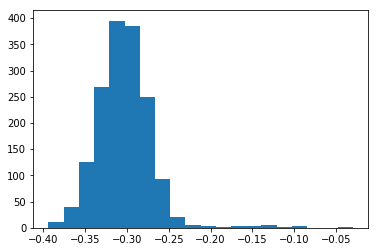

In [45]:
plt.hist(answers, bins=20)
plt.show()

In [46]:
a = np.random.binomial(500, 0.3, 10000)
a.mean()/500., a.std()/500., (a / 500.).std()

(0.2999672, 0.020373034240387465, 0.020373034240387465)

In [47]:
sigma = np.sqrt(500 * 0.3 * 0.7)
sigma / 500

0.020493901531919195

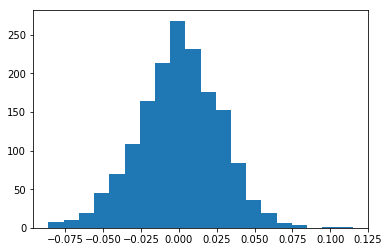

In [48]:
plt.hist(answers-np.array(values)[0], bins=20)
plt.show()

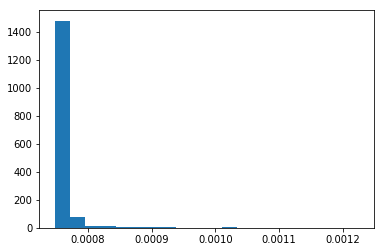

In [49]:
plt.hist(np.array(values)[1], bins=20)
plt.show()

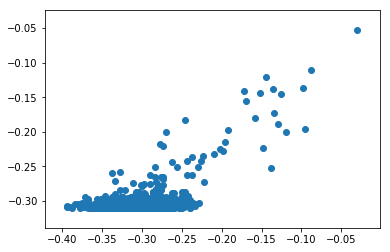

In [50]:
plt.scatter(answers, np.array(values)[0])
plt.show()

In [51]:
#errors = np.concatenate(tuple(errors))
#estimated_objectives = np.concatenate(tuple(estimated_objectives))
#best_points = np.concatenate(tuple(best_points))

Text(0.5,0,'iteration')

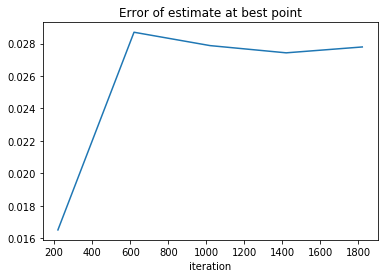

In [52]:
plt.plot(X, np.sqrt(errors))
plt.title('Error of estimate at best point')
plt.xlabel('iteration')

Text(0.5,0,'iteration')

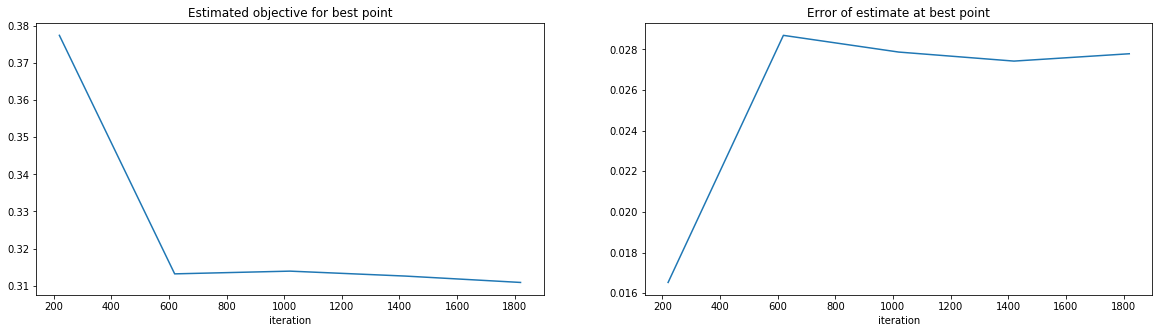

In [53]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(X, -np.array(estimated_objectives))
plt.title('Estimated objective for best point')
plt.xlabel('iteration')
plt.subplot(1, 2, 2)
plt.plot(X, np.sqrt(errors))
plt.title('Error of estimate at best point')
plt.xlabel('iteration')

In [54]:
objectives = observations.dropna()['objective'].values
best_values = [objectives[0]]
for i in range(1, len(objectives)):
    obj = objectives[i]
    if obj > best_values[-1]:
        best_values.append(obj)
    else:
        best_values.append(best_values[-1])

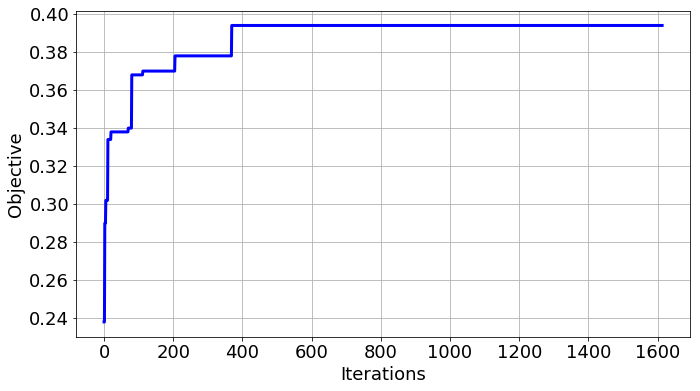

In [79]:
plt.figure(figsize=(11, 6))
plt.plot(best_values, linewidth=3, color='b')
plt.xlabel('Iterations', size=18)
plt.ylabel('Objective', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.grid()

plt.savefig("pics/iters.pdf", format='pdf', bbox_inches='tight', transparent=False)
plt.show()

In [56]:
from sklearn.gaussian_process import GaussianProcessRegressor

reg = GaussianProcessRegressor(normalize_y=False, n_restarts_optimizer=0, alpha=10**-10)
XX = observations.dropna()[observations.columns[:-3]].values
yy = -observations.dropna()[observations.columns[-1]].values
reg.fit(XX, yy)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [57]:
reg.score(XX, yy)

0.8973820027024585

In [58]:
yy_pred, sigma = reg.predict(XX, return_std=True)

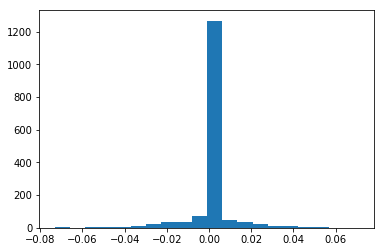

In [59]:
plt.hist(yy-yy_pred, bins=20)
plt.show()

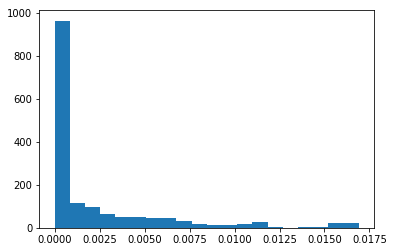

In [60]:
plt.hist(sigma, bins=20)
plt.show()

In [61]:
sigma[yy_pred.argmin()]

0.0

In [62]:
yy_pred.argmin()

369

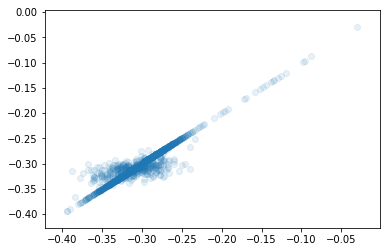

In [63]:
plt.scatter(yy, yy_pred, alpha=0.1)
plt.show()

In [81]:
XX = observations.dropna()[observations.columns[:-3]].values
yy = -observations.dropna()[observations.columns[-1]].values
indexes = np.arange(len(XX))
Y_true = []
Y_pred = []
step_size = 100
X2 = np.arange(0, 1600+step_size, step_size)


for i in X2:
    sel = (indexes != i)
    
    reg = GaussianProcessRegressor(normalize_y=False, n_restarts_optimizer=0)
    reg.fit(XX[sel], yy[sel])
    
    y_true = yy[i]
    y_pred = reg.predict(XX[[i], :])[0]
    
    Y_true += [y_true]
    Y_pred += [y_pred]

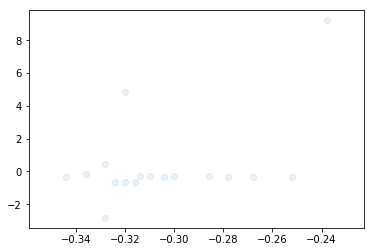

In [82]:
plt.scatter(Y_true, Y_pred, alpha=0.1)
plt.show()

In [87]:
errors = []
estimated_objectives = []
best_points = []

step_size = 100
X = np.arange(20, 1620+step_size, step_size)

for step in X:
    design = observations.dropna()[observations.columns[:-3]].values[:step]
    #because we want to maximize
    answers = -observations.dropna()[observations.columns[-1:]].values[:step]

    reg = GaussianProcessRegressor(normalize_y=False, n_restarts_optimizer=0, alpha=10**-4)
    reg.fit(design, answers)

    yy_pred, sigma = reg.predict(design, return_std=True)
    arm = yy_pred.argmin()
    
    errors.append(sigma[arm])
    best_points.append(arm)
    estimated_objectives.append(yy_pred[arm])
    print(step)

20
120
220
320
420
520
620
720
820
920
1020
1120
1220
1320
1420
1520
1620


Text(0.5,0,'iteration')

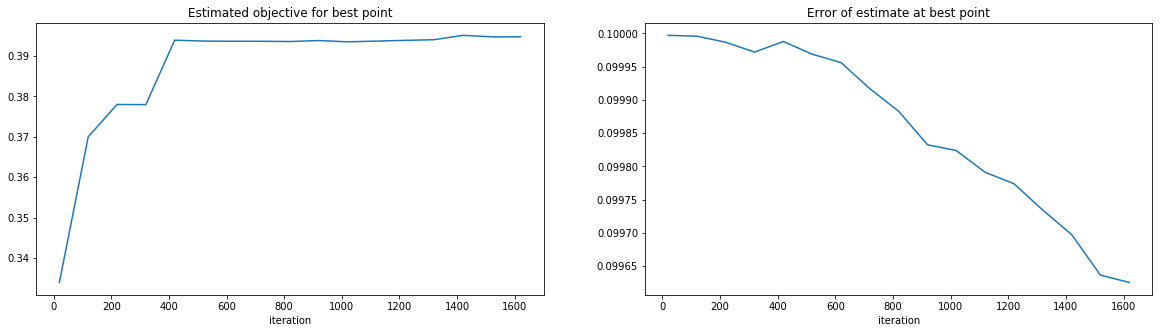

In [88]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(X, -np.array(estimated_objectives))
plt.title('Estimated objective for best point')
plt.xlabel('iteration')
plt.subplot(1, 2, 2)
plt.plot(X, np.sqrt(errors))
plt.title('Error of estimate at best point')
plt.xlabel('iteration')

In [68]:
GPyOpt.methods.BayesianOptimization()

TypeError: __init__() missing 1 required positional argument: 'f'

In [180]:
observations.head()

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,reconstructible,reco_passed_no_clones,objective
0,3.6,3.436777,1.128810,2.210571,6.893522,11.797108,8.701587,157.0,119.0,0.238
1,3.6,3.491098,3.638826,2.318519,6.633024,11.303923,13.511367,135.0,60.0,0.120
2,3.6,1.934191,1.723673,1.566266,6.826156,11.784093,8.594912,155.0,145.0,0.290
3,3.6,3.372442,2.453974,2.263205,4.947135,11.594591,13.698964,135.0,112.0,0.224
4,3.6,3.251162,3.225302,2.697990,5.830484,11.440073,5.547616,147.0,74.0,0.148


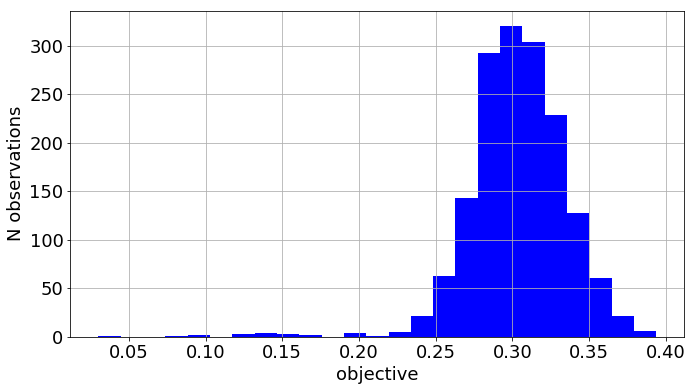

In [188]:
plt.figure(figsize=(11, 6))
plt.hist(observations.dropna().objective.values, bins=25, color='b')
plt.xlabel('objective', size=18)
plt.ylabel('N observations', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.grid()
plt.show()